In [1]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import random

In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


In [3]:
x_train=x_train/255
x_test=x_test/255

In [4]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                       keras.layers.Dense(128,activation="relu"),
                       keras.layers.Dense(10,activation="softmax")
                       ])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(optimizer="sgd",
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [7]:
history=model.fit(x_train,
                 y_train,validation_data=(x_test,y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6473 - accuracy: 0.8389 - val_loss: 0.3537 - val_accuracy: 0.9055
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3356 - accuracy: 0.9058 - val_loss: 0.2940 - val_accuracy: 0.9197
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2884 - accuracy: 0.9188 - val_loss: 0.2616 - val_accuracy: 0.9236


In [8]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.2616 - accuracy: 0.9236
Loss=0.262
Accuracy=0.924


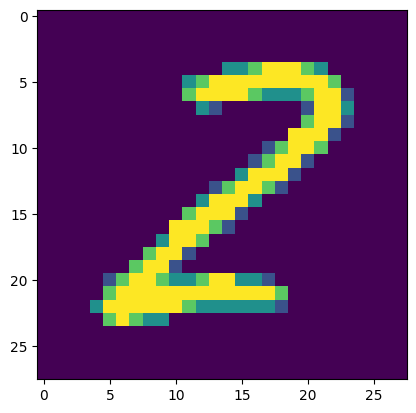

313/313 [==============================] - 1s 4ms/step


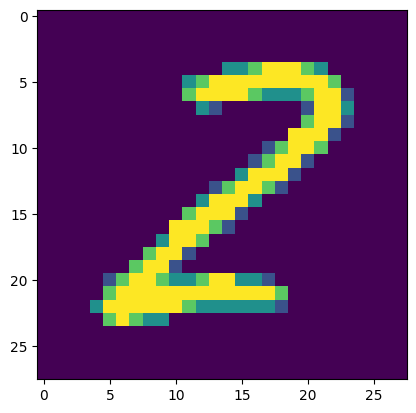

In [9]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [10]:
print('Predicted Value:',predicted_value[n])

Predicted Value: [2.7601202e-03 1.1738245e-02 6.2089235e-01 8.3684504e-02 1.8740322e-05
 1.4777043e-02 5.4864194e-03 1.9751892e-06 2.6062891e-01 1.1657101e-05]


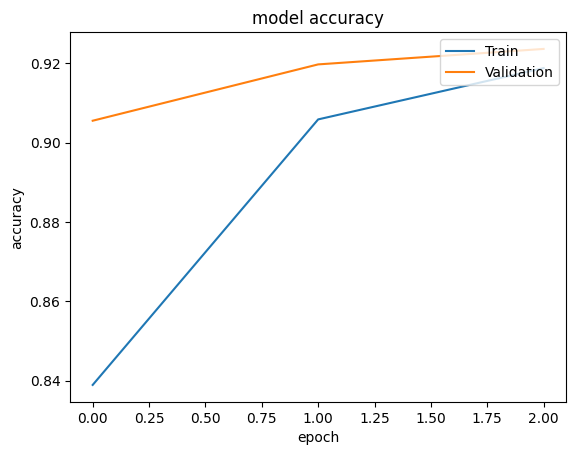

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

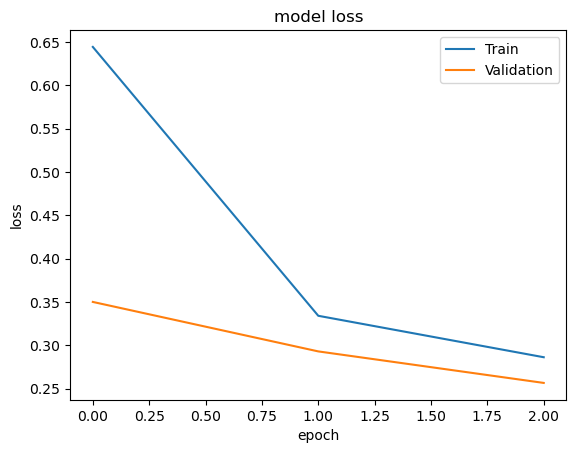

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()